In [1]:
path =  '/mnt/data/zhujun/dataset/Youtube/'
from PIL import Image
import os
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt

from benchmarking.video import YoutubeVideo
from benchmarking.utils.model_utils import eval_single_image
from benchmarking.utils.utils import interpolation, compute_f1


In [2]:
import glob
def load_vigil_result(path):
    vigil_perf = {}
    for file in glob.glob(path + 'results/vigil_e2e_result*.csv'):
        if 'with_videosize' not in file:
            continue
        print(file)
        with open(file, 'r') as f:
            firstline = f.readline()
#             print(firstline)
            for line in f:
                line_list = line.strip().split(',')
                key = line_list[0]
                bw = float(line_list[1])
                f1 = float(line_list[2])
                vigil_perf[key] = (bw, f1)
    return vigil_perf

In [3]:
vigil_perf = load_vigil_result('./vigil/')


./vigil/results/vigil_e2e_result_motorway_with_videosize.csv
./vigil/results/vigil_e2e_result_nyc_with_videosize.csv
./vigil/results/vigil_e2e_result_cropped_crossroad4_2_with_videosize.csv
./vigil/results/vigil_e2e_result_driving2_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad_with_videosize.csv
./vigil/results/vigil_e2e_result_driving_downtown_with_videosize.csv
./vigil/results/vigil_e2e_result_park_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad2_with_videosize.csv
./vigil/results/vigil_e2e_result_jp_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad2_night_with_videosize.csv
./vigil/results/vigil_e2e_result_lane_split_with_videosize.csv
./vigil/results/vigil_e2e_result_russia_with_videosize.csv
./vigil/results/vigil_e2e_result_tw_under_bridge_with_videosize.csv
./vigil/results/vigil_e2e_result_driving1_with_videosize.csv
./vigil/results/vigil_e2e_result_crossroad3_with_videosize.csv
./vigil/results/vigil_e2e_result_drift_with_videosize.csv
./

In [4]:
# def load_noscope_result(path):
#     noscope_perf = {}
#     for file in glob.glob(path + 'Noscope_e2e*.csv'):
#         if 'with_frame_diff' not in file:
#             continue
#         print(file)
#         if file == './noscope/Noscope_e2e_result_crossroad2_night_with_frame_diff.csv':
#             continue
#         if file == './noscope/Noscope_e2e_result_drift_with_frame_diff.csv':
#             continue
#         if file == './noscope/Noscope_e2e_result_driving2_with_frame_diff.csv':
#             continue
#         with open(file, 'r') as f:
#             f.readline()
#             for line in f:
#                 line_list = line.strip().split(',')
#                 key = line_list[0]
#                 bw = float(line_list[3])
#                 f1 = float(line_list[2])
#                 noscope_perf[key] = (bw, f1)                
#     return noscope_perf

def load_noscope_result(path):
    # only profile on first segment
    noscope_perf = {}
    file = './noscope/Noscope_e2e_result_with_frame_diff_allvideo_profile_once.csv'
    with open(file, 'r') as f:
        f.readline()
        for line in f:
            line_list = line.strip().split(',')
            key = line_list[0]
            bw = float(line_list[4])
            f1 = float(line_list[3])
            noscope_perf[key] = (bw, f1)                
    return noscope_perf


In [5]:
noscope_perf = load_noscope_result('./noscope/')

crossroad2_night_5 (3.9954905580653928, 0.9516441005802707) (14.2693288731354, 0.8836424957841483)
crossroad2_night_23 (5.54896310627444, 1.0) (27.845656087767782, 0.14634146341463414)
drift_26 (6.302340343952938, 0.8857142857142857) (14.326363826489846, 0.8117647058823529)
driving1_23 (1.042210134040002, 0.6258992805755396) (1.5231367299814915, 0.5876543209876544)
driving2_2 (1.1397509098479264, 1.0) (1.6146927877530035, 0.037037037037037035)
driving2_12 (1.680722951415499, 0.9781818181818182) (1.744219570627032, 0.9093851132686084)
driving2_21 (1.0917791493772075, 0.6666666666666666) (1.958919321376208, 0.45901639344262296)
driving2_32 (1.2757403027045497, 0.8292682926829268) (1.4304734644687203, 0.7853107344632768)
driving2_34 (1.1461923327167, 0.9487179487179489) (1.8706557902194063, 0.8080808080808081)
driving2_37 (1.18489662416607, 0.9122807017543859) (2.0129201471342633, 0.6458333333333334)
park_0 (0.7244358188637692, 0.8172757475083057) (0.7430819575475959, 0.3294392523364486)


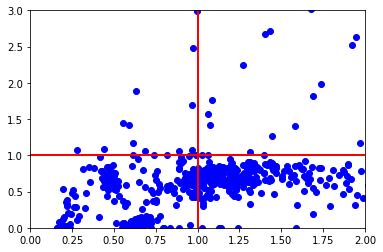

In [6]:

fig,ax = plt.subplots(1)

for key in noscope_perf.keys():
    if key not in vigil_perf:
        print('{} missing'.format(key))
        continue
    if noscope_perf[key][1] == 0 or noscope_perf[key][0] == 0:
        continue
    relative_f1 = vigil_perf[key][1]/noscope_perf[key][1]
    relative_bw = vigil_perf[key][0]/noscope_perf[key][0]
    if relative_f1 > 1 and relative_bw < 1:
        print(key, vigil_perf[key], noscope_perf[key])
    if 'cropped' in key:
        continue
    ax.scatter(relative_bw, relative_f1, c='b')
    ax.axhline(y=1, color='r', linestyle='-')
    ax.axvline(x=1, color='r', linestyle='-')
    ax.set_xlim(0,2)
    ax.set_ylim(0,3)

In [ ]:
fig,ax = plt.subplots(1)
noscope_perf = {}

file1 = './noscope/Noscope_e2e_result_crossroad2_night_with_frame_diff_by_daytimedata.csv'
with open(file1, 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        key = line_list[0]
        bw = float(line_list[3])
        f1 = float(line_list[2])
        noscope_perf[key] = (bw, f1)
        ax.scatter(bw, f1, c='b')
        
file2 = './noscope/Noscope_e2e_result_crossroad2_night_with_frame_diff.csv'
with open(file2, 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        key = line_list[0]
        bw = float(line_list[3])
        f1 = float(line_list[2])
        
#         if key in noscope_perf:
            
#             ax.scatter(bw - noscope_perf[key][0], f1 - noscope_perf[key][1], c='r')
        
               

ax.set_xlabel('Cost (Bandwidth)')
ax.set_ylabel('Accuracy (F1)')
        
        